In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,ConfusionMatrixDisplay
)

In [3]:
df = pd.read_csv("Loan_default..csv")
print("Shape:", df.shape)
df.head()

Shape: (148670, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_

In [5]:
#Check missing values
print(df.isnull().sum())

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Missing values summary
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("\nMissing Values Summary:")
print(missing_summary[missing_summary > 0])


Missing Values Summary:
Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
property_value               15098
LTV                          15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
age                            200
submission_of_application      200
loan_purpose                   134
Neg_ammortization              121
term                            41
dtype: int64


In [8]:
# Percentage of missing data per column
missing_percent = (df.isnull().mean() * 100).round(2)
print("\nMissing Data Percentage:")
print(missing_percent[missing_percent > 0])


Missing Data Percentage:
loan_limit                    2.25
approv_in_adv                 0.61
loan_purpose                  0.09
rate_of_interest             24.51
Interest_rate_spread         24.64
Upfront_charges              26.66
term                          0.03
Neg_ammortization             0.08
property_value               10.16
income                        6.15
age                           0.13
submission_of_application     0.13
LTV                          10.16
dtir1                        16.22
dtype: float64


In [9]:
# Exploratory Data Analysis (EDA)
print("\nBasic Statistics:")
df.describe(include='all')


Basic Statistics:


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
count,148670.000000,148670.0,145326,148670,147762,148670,148536,148670,148670,148670,...,148670,148670.000000,148670,148470,148470,133572.000000,148670,148670,148670.000000,124549.000000
unique,NaN,NaN,2,4,2,3,4,2,2,2,...,4,NaN,2,7,2,NaN,4,2,NaN,NaN
top,NaN,NaN,cf,Male,nopre,type1,p3,l1,nopc,nob/c,...,CIB,NaN,CIB,45-54,to_inst,NaN,North,direct,NaN,NaN
freq,NaN,NaN,135348,42346,124621,113173,55934,142344,148114,127908,...,48152,NaN,74392,34720,95814,NaN,74722,148637,NaN,NaN
mean,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.789103,NaN,NaN,NaN,72.746457,NaN,NaN,0.246445,37.732932
std,42917.476598,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,115.875857,NaN,NaN,NaN,39.967603,NaN,NaN,0.430942,10.545435
min,24890.000000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500.000000,NaN,NaN,NaN,0.967478,NaN,NaN,0.000000,5.000000
25%,62057.250000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,599.000000,NaN,NaN,NaN,60.474860,NaN,NaN,0.000000,31.000000
50%,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.000000,NaN,NaN,NaN,75.135870,NaN,NaN,0.000000,39.000000
75%,136391.750000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,800.000000,NaN,NaN,NaN,86.184211,NaN,NaN,0.000000,45.000000


In [10]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\nNUMERICAL COLUMNS: {num_cols}")
print(f"\nCATEGORICAL COLUMNS: {cat_cols}")


NUMERICAL COLUMNS: ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']

CATEGORICAL COLUMNS: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


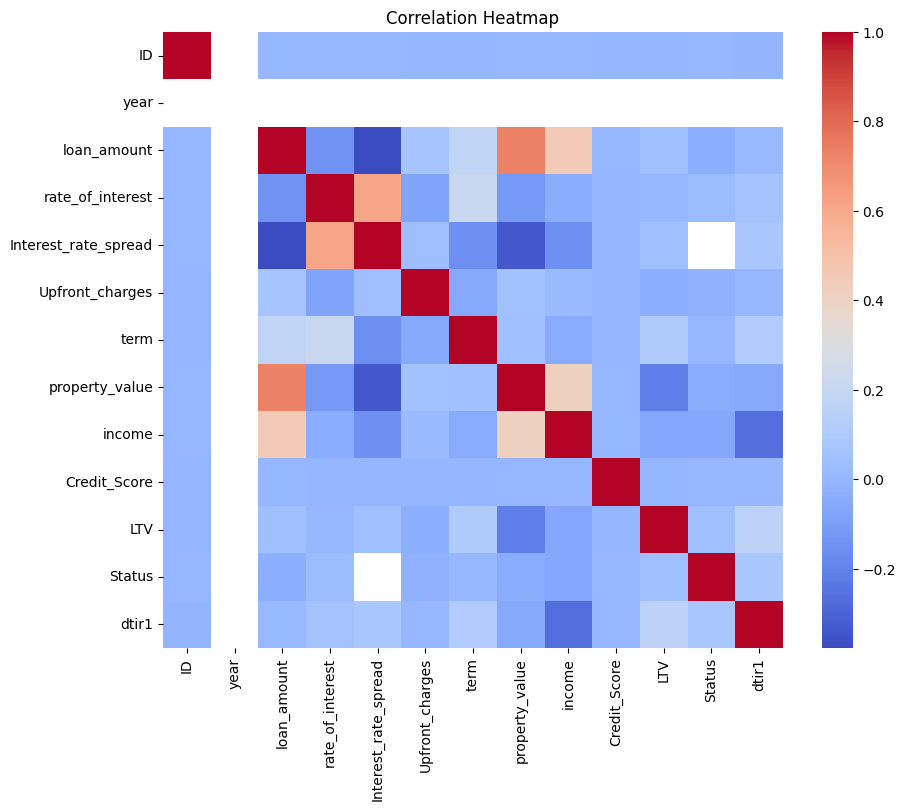

In [11]:
# Correlation heatmap
if len(num_cols) > 1:
 corr = df[num_cols].corr()
 plt.figure(figsize=(10,8))
 sns.heatmap(corr, cmap='coolwarm', annot=False)
 plt.title('Correlation Heatmap')
 plt.show()

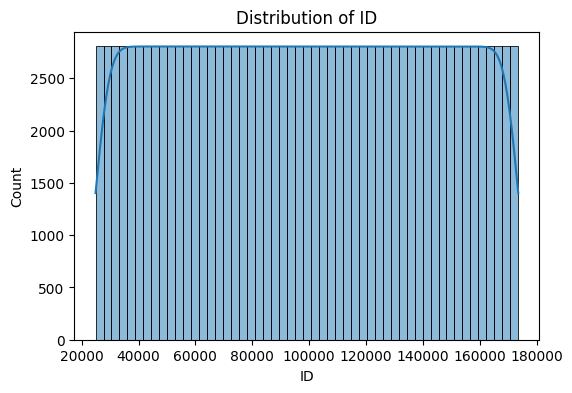

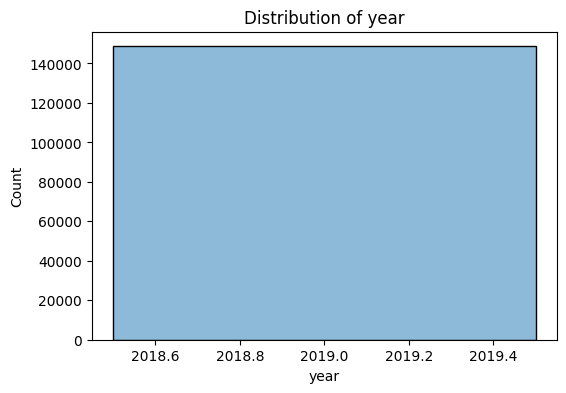

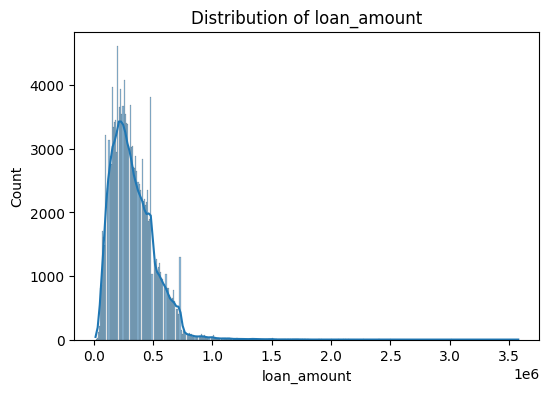

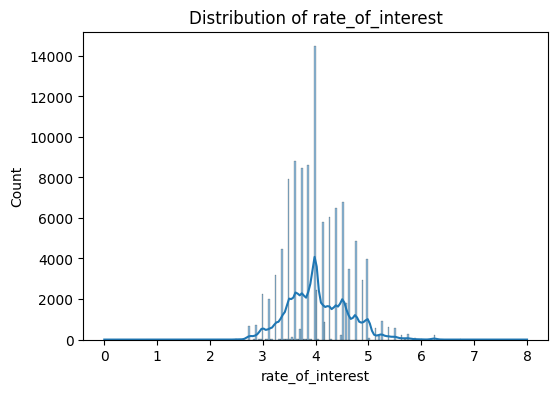

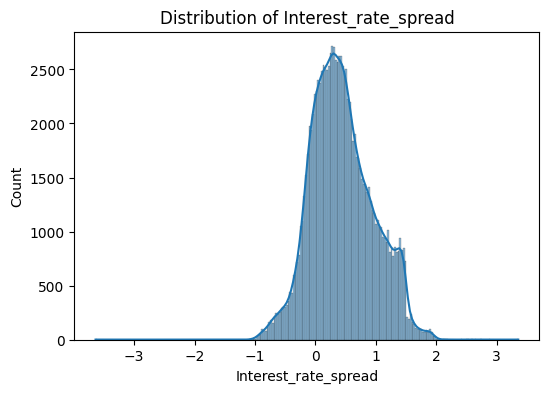

In [12]:
for col in num_cols[:5]:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col].dropna(), kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

In [14]:
# Categorical variable counts (for first few)
for col in cat_cols[:5]:
  print(f"\nValue counts for {col}:")
  print(df[col].value_counts(normalize=True).head())


Value counts for loan_limit:
loan_limit
cf     0.931341
ncf    0.068659
Name: proportion, dtype: float64

Value counts for Gender:
Gender
Male                 0.284832
Joint                0.278462
Sex Not Available    0.253306
Female               0.183399
Name: proportion, dtype: float64

Value counts for approv_in_adv:
approv_in_adv
nopre    0.84339
pre      0.15661
Name: proportion, dtype: float64

Value counts for loan_type:
loan_type
type1    0.761236
type2    0.139652
type3    0.099112
Name: proportion, dtype: float64

Value counts for loan_purpose:
loan_purpose
p3    0.376569
p4    0.368927
p1    0.232462
p2    0.022042
Name: proportion, dtype: float64


In [15]:
# Correlation matrix (for numeric variables)
if len(num_cols) > 1:
  corr = df[num_cols].corr()
  print("\nTop correlations:")
  print(corr.unstack().sort_values(ascending=False).drop_duplicates().head(10))


Top correlations:
ID                    ID                  1.000000
property_value        loan_amount         0.734249
Interest_rate_spread  rate_of_interest    0.614908
income                loan_amount         0.456065
                      property_value      0.414883
rate_of_interest      term                0.209330
term                  loan_amount         0.174474
dtir1                 LTV                 0.156557
term                  dtir1               0.110572
LTV                   term                0.106834
dtype: float64


In [16]:
 #target_detection
preferred_names = ['default', 'loan_default', 'defaulted', 'target', 'loan_status', 'is_default', 'bad_loan', 'DEFAULT', 'loan_limit']
cols_lower = [c.lower().strip() for c in df.columns]


target_col = None
for n in preferred_names:
  if n.lower() in cols_lower:
    target_col = df.columns[cols_lower.index(n.lower())]
    break
if target_col is None:
  candidates = [c for c in df.columns if df[c].nunique(dropna=True) == 2]
  target_col = candidates[0] if candidates else df.columns[-1]
print(f"Detected target column: {target_col}")


df = df.dropna(how='all')

Detected target column: loan_limit


In [17]:
# Drop rows with missing target
if df[target_col].isna().sum() > 0:
  df = df[~df[target_col].isna()].copy()

In [19]:
# Map target to binary
df = df.dropna(subset=[target_col])
if df[target_col].dtype == object:
  uniq = df[target_col].unique()
  mapping = {uniq[0]:0, uniq[1]:1}
  df[target_col] = df[target_col].map(mapping)
  print(f"Mapped target values: {mapping}")

Mapped target values: {'cf': 0, 'ncf': 1}


In [20]:
# 6) Modeling Preparation
# -----------------------------
# #hashtag #feature_prep
X = df.drop(columns=[target_col])
y = df[target_col]


id_cols = [c for c in X.columns if c.lower() in ('id','loan_id','account_id')]
if id_cols:
  X = X.drop(columns=id_cols)


num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [21]:
#Preprocessing pipelines
numeric_transformer = Pipeline([
     ('imputer', SimpleImputer(strategy='median')),
     ('scaler', StandardScaler())
])


categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

In [22]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
#Model training and evaluation
models = {
  'Logistic Regression': Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=500))]),
  'Random Forest': Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))]),
  'Decision Tree': Pipeline([('pre', preprocessor), ('clf', DecisionTreeClassifier(random_state=42))]),
  'Naive Bayes': Pipeline([('pre', preprocessor), ('clf', GaussianNB())])
}


try:
  from xgboost import XGBClassifier
  models['XGBoost'] = Pipeline([('pre', preprocessor), ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])
except Exception:
  models['XGBoost (sklearn_GB)'] = Pipeline([('pre', preprocessor), ('clf', GradientBoostingClassifier(random_state=42))])

In [46]:
#Evaluate Models
results = []
conf_matrices = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except:
        y_prob = np.zeros_like(y_pred, dtype=float)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    sens = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if len(np.unique(y_test))>1 else np.nan
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp)>0 else np.nan

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Sensitivity': round(sens, 4),
        'Precision': round(prec, 4),
        'Specificity': round(spec, 4),
        'F1-Score': round(f1, 4),
        'AUC': round(auc, 4)
    })

    conf_matrices[name] = confusion_matrix(y_test, y_pred)


print("\nModel Performance Summary:")


pd.DataFrame(results,
    columns=["Model","Accuracy","Sensitivity","Precision","Specificity","F1-Score","AUC"])




Training Logistic Regression...

Training Random Forest...

Training Decision Tree...

Training Naive Bayes...

Training XGBoost (sklearn_GB)...

Model Performance Summary:


,Model,Accuracy,Sensitivity,Precision,Specificity,F1-Score,AUC
0,Logistic Regression,0.9397,0.1468,0.8567,0.9982,0.2506,0.7677
1,Random Forest,0.9486,0.2635,0.9564,0.9991,0.4132,0.8362
2,Decision Tree,0.9108,0.4108,0.3667,0.9477,0.3875,0.6793
3,Naive Bayes,0.0923,0.9885,0.0696,0.0263,0.1301,0.6317
4,XGBoost (sklearn_GB),0.9484,0.2650,0.9430,0.9988,0.4138,0.8545


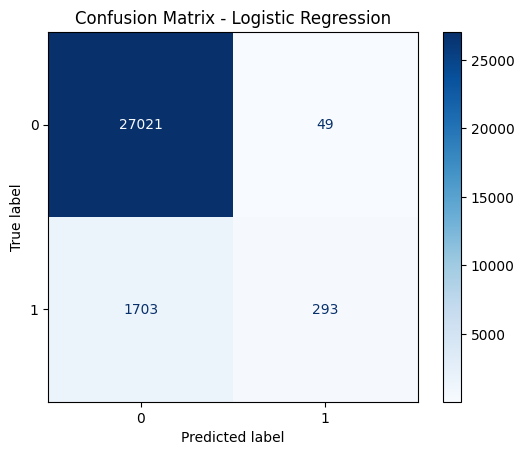

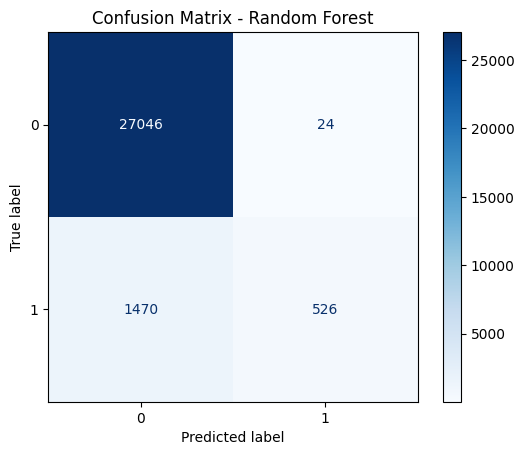

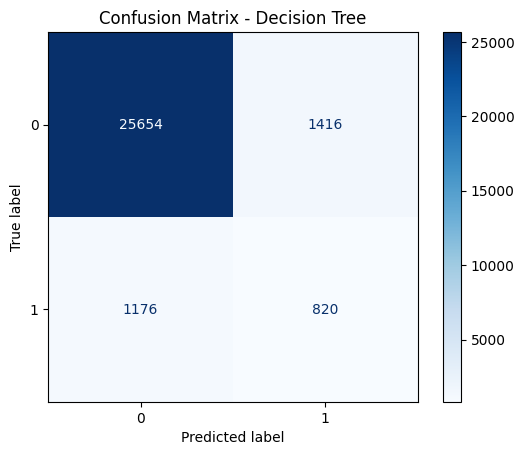

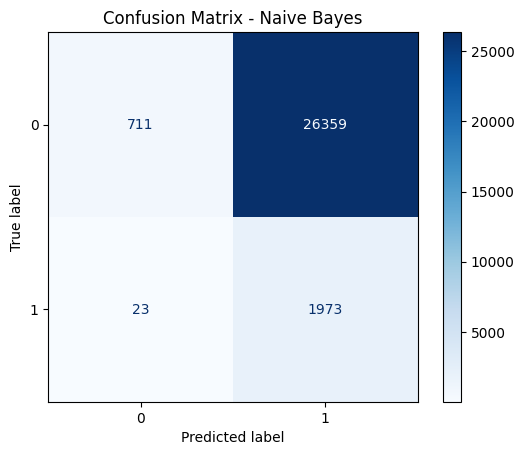

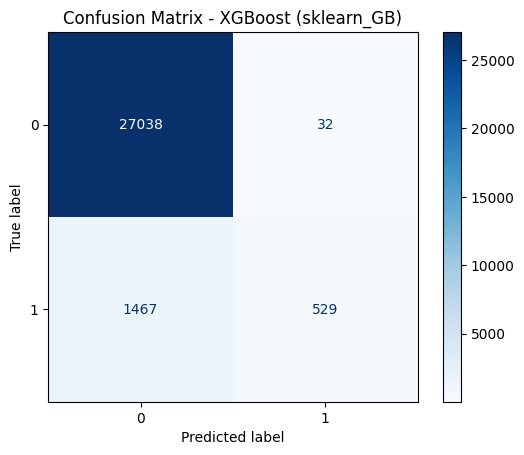

In [44]:
#Confusion Matrices Visualization

for name, cm in conf_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()



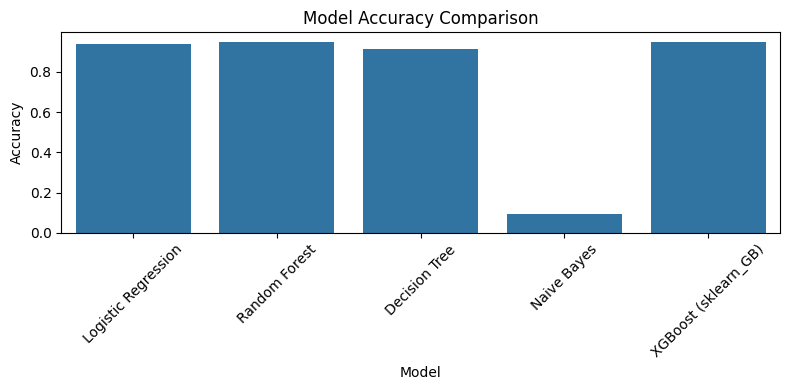

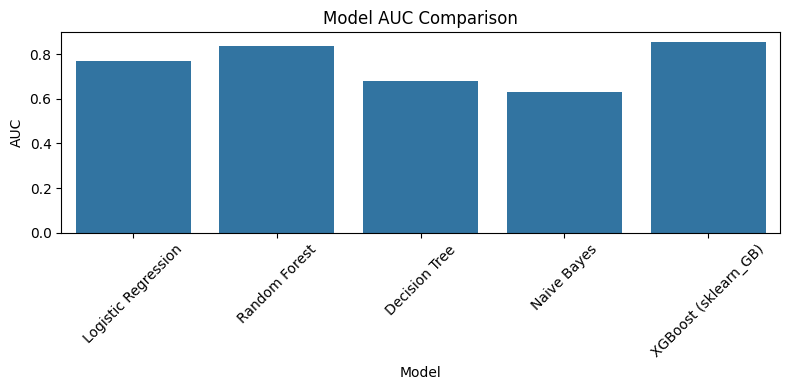

In [45]:
#Model Comparison Visualization
results_df = pd.DataFrame(results).set_index('Model')
plt.figure(figsize=(8,4))
sns.barplot(x=results_df.index, y=results_df['Accuracy'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
sns.barplot(x=results_df.index, y=results_df['AUC'])
plt.title('Model AUC Comparison')
plt.ylabel('AUC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
#Results

results_df.to_csv('model_performance_full_evaluation.csv', index=True)
print("Results saved to model_performance_full_evaluation.csv")

Results saved to model_performance_full_evaluation.csv
